In [102]:
from scipy import fft
import numpy as np
from math import *
from matplotlib import pyplot as plt
import timeit

In [103]:
def gauss(x, sigma, A):
    return A * np.exp(-(x ** 2) / (sigma ** 2))

In [104]:
def rect(x):
    return 1 if abs(x) < 1 else (0 if abs(x) > 1 else 0.5)

In [105]:
def iexp(n):
    return complex(cos(n), sin(n))

def dft(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(-2 * pi * i * k / n) for k in range(n)))
            for i in range(n)]

In [106]:
delta = 5
t = np.arange(-delta, delta, 0.05, dtype='complex_')

In [107]:
sigma = 0.5
L = 2

In [108]:
k = 100

In [109]:
ry = [rect(i / L) for i in t]
gy = [gauss(i, sigma, 1) for i in t]

In [110]:
gfft = fft.fftshift(fft.fft(gy))
gdft = fft.fftshift(dft(gy))

c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


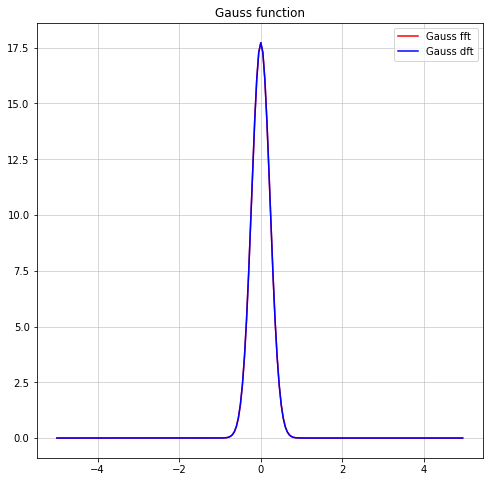

In [111]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Gauss function')
plt.plot(t, np.abs(gfft), color='r', label='Gauss fft')
plt.plot(t, np.abs(gdft), color='b', label='Gauss dft')
plt.legend()

In [112]:
rfft = fft.fftshift(fft.fft(ry))
rdft = fft.fftshift(dft(ry))

c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


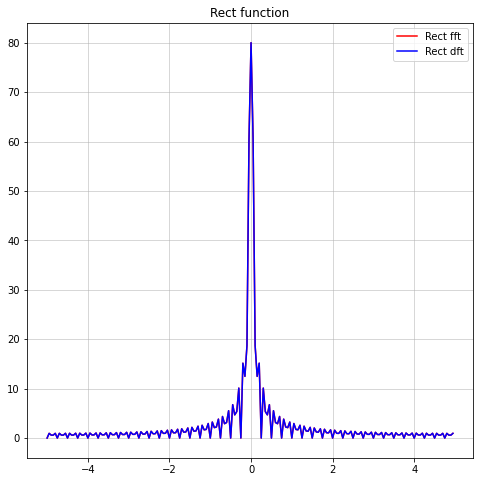

In [113]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Rect function')
plt.plot(t, np.abs(rfft), color='r', label='Rect fft')
plt.plot(t, np.abs(rdft), color='b', label='Rect dft')
plt.legend()

In [114]:
print('FFT: {:7.7f}'.format(timeit.timeit(lambda: fft.fft(gy), number = k) / k))
print('DFT: {:7.7f}'.format(timeit.timeit(lambda: dft(gy), number = k) / k))

FFT: 0.0000286
DFT: 0.0343909


In [115]:
print('FFT: {:7.7f}'.format(timeit.timeit(lambda: fft.fft(ry), number = k) / k))
print('DFT: {:7.7f}'.format(timeit.timeit(lambda: dft(ry), number = k) / k))

FFT: 0.0000242
DFT: 0.0235957
